In [1]:
import numpy as np
import matplotlib.pyplot as plt

# $\alpha$-stable distribution

In [2]:
def stable(alpha, beta, gamma, delta, n):
    Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
    W = np.random.exponential(1, n)
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
    if alpha != 1:
        Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
        X = gamma * Z + delta
    else:
        Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
        X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
    return X

# Simulate Levy processes

In [3]:
def simulate_process(Z, n, delta):
    X = [0]
    for k in range(n-1):
        X.append(X[k] + Z[k])
    return X

# Mean square displacment

## Methods

Process $X(t)$. Trajectories $X_k(t)$, where $k = 1, ..., N$, $t = 0, ..., n$

### Ensemple average MSD

$\text{EA-MSD}(\tau) = \frac{1}{N} \sum_{k=1}^{N} (x_k(\tau) - x_k(0))^2$

In [4]:
def ea_msd(X, tau):
    return np.mean((X[:, tau] - X[:, 0])**2)

### Time average MSD

$\text{TA-MSD}(\tau, k) = \frac{1}{n + 1 - \tau} \sum_{t=0}^{n-\tau} (x_k(t + \tau) - x_k(t))^2$

In [5]:
def ta_msd(X_k, tau):
    n = len(X_k)
    msd = 0
    for i in range(n - tau):
        msd += (X_k[i + tau] - X_k[i])**2
    return msd / (n - tau)

### Ensemble & time average MSD

$\text{EA-TA-MSD}(\tau) = \mathbb{E}(\text{TA-MSD}(\tau))$

In [6]:
def ea_ta_msd(X, tau):
    ea_ta_msd_all = []
    for t in tau:
        ta_msd_all = [ta_msd(X_k, t) for X_k in X]
        ea_ta_msd_all.append(ta_msd_all)
    return np.mean(ea_ta_msd_all, axis = 1)

## Calculate 

### For Brownian motion

In [7]:
n = 1000
delta = 0.5
N = 50
t_br = [k * delta for k in range(n)]
tau = list(range(0, n))

In [8]:
X_br = []
for i in range(N):
    Z_br = np.random.normal(0, delta, n)
    X_br.append(simulate_process(Z_br, n, delta))
X_br = np.array(X_br)
# plt.plot(t_br, np.transpose(X_br))
# plt.axhline(0, color = 'black')
# plt.show()

In [9]:
ea_msd_br = [ea_msd(X_br, t) for t in tau]

# plt.plot(tau, ea_msd_br)
# plt.title('EA-MSD')
# plt.show()

In [10]:
ta_msd_br = []
for i in range(N):
    X_k = X_br[i]
    ta_msd_all = []
    for t in tau:
        ta_msd1 = ta_msd(X_k, t)
        ta_msd_all.append(ta_msd1)
    ta_msd_br.append(ta_msd_all)

# plt.plot(tau, np.transpose(ta_msd_br))
# plt.title('TA-MSD')
# plt.show()

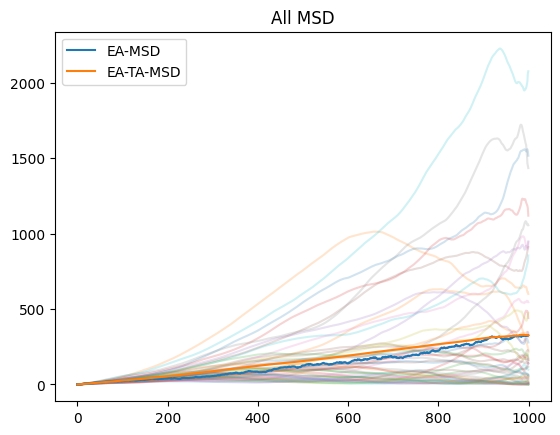

In [11]:
ea_ta_msd_br = ea_ta_msd(X_br, tau)

plt.plot(tau, np.transpose(ta_msd_br), alpha = 0.2)
plt.plot(tau, ea_msd_br, label = 'EA-MSD')
plt.plot(tau, ea_ta_msd_br, label = 'EA-TA-MSD')
plt.title('All MSD')
plt.legend()
plt.show()

### $\alpha$-stable motion

In [12]:
n = 1000
delta = 0.5
N = 50
t_st = [k * delta for k in range(n)]
tau = list(range(0, n))

In [13]:
X_st = []
alpha = 1.5
beta = 0
gamma = delta**(1/alpha)
delt = 0
for i in range(N):
    Z_st = stable(alpha, beta, gamma, delt, n)
    X_st.append(simulate_process(Z_st, n, delta))
X_st = np.array(X_st)
# plt.plot(t_st, np.transpose(X_st))
# plt.axhline(0, color = 'black')
# plt.show()

In [14]:
ea_msd_st = [ea_msd(X_st, t) for t in tau]

# plt.plot(tau, ea_msd_st)
# plt.title('EA-MSD')
# plt.show()

In [15]:
ta_msd_st = []
for i in range(N):
    X_k = X_st[i]
    ta_msd_all = []
    for t in tau:
        ta_msd1 = ta_msd(X_k, t)
        ta_msd_all.append(ta_msd1)
    ta_msd_st.append(ta_msd_all)

# plt.plot(tau, np.transpose(ta_msd_st))
# plt.title('TA-MSD')
# plt.show()

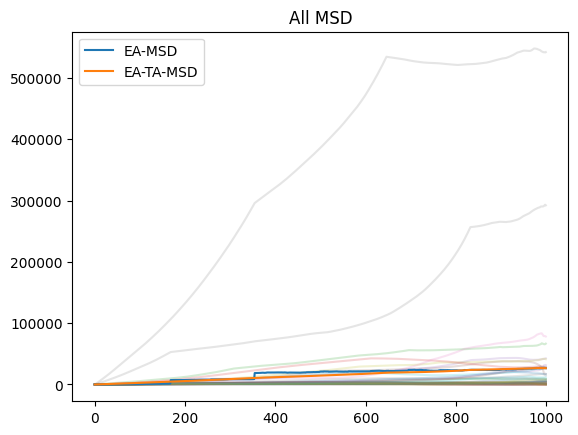

In [16]:
ea_ta_msd_st = ea_ta_msd(X_st, tau)

plt.plot(tau, np.transpose(ta_msd_st), alpha = 0.2)
plt.plot(tau, ea_msd_st, label = 'EA-MSD')
plt.plot(tau, ea_ta_msd_st, label = 'EA-TA-MSD')
plt.title('All MSD')
plt.legend()
plt.show()